In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest


In [3]:
#Loading the dataset
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

EXPLORATORY DATA ANALYSIS

In [5]:
#check null values
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

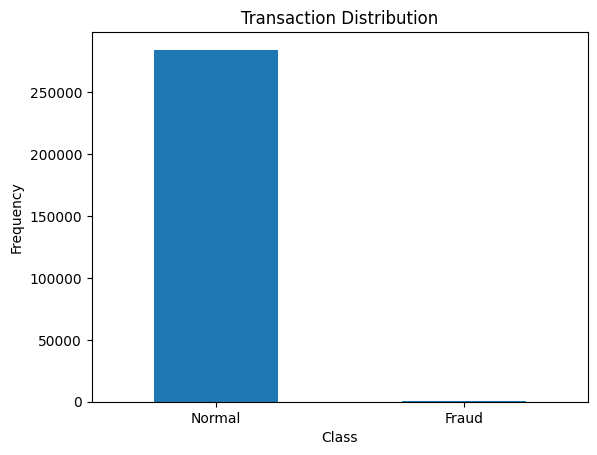

In [6]:
#frequency of normal and fraud transactions
LABELS = ["Normal",'Fraud']
count_classes = pd.value_counts(data['Class'],sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [61]:
print("Fraud transactions:{}".format(len(fraud)))
print("Normal transactions:{}".format(len(normal)))

Fraud transactions:492
Normal transactions:284315


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
#fraud and normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

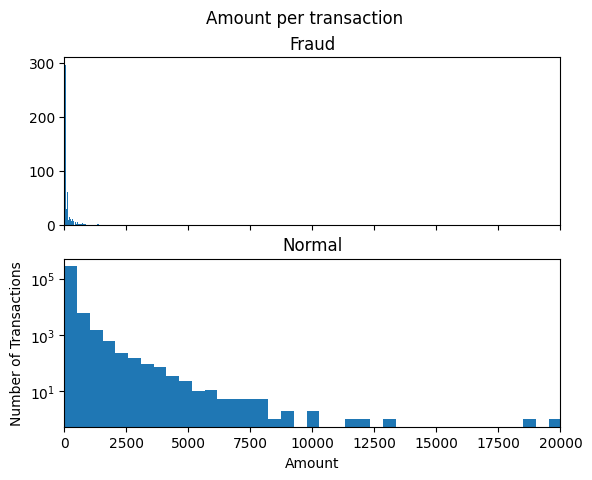

In [63]:
#Transaction amounts
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transaction")
bins = 50
ax1.hist(fraud.Amount,bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

RANDOM FOREST

In [16]:
#splitting the datasest
x = data.drop('Class',axis =1)
y = data['Class']

In [17]:
#checking for imbalance in data
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

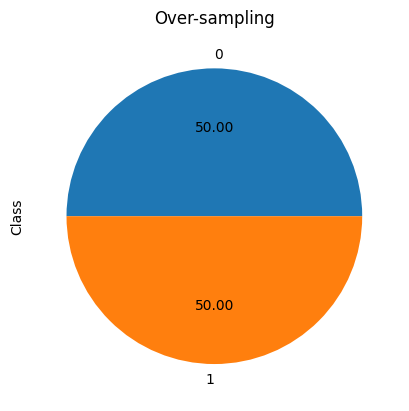

In [18]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1)
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
#verifying the oversampling
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [21]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=30)

In [22]:
#Model building and training 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30,max_features="auto")
rf.fit(x_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=30)

In [23]:
#making prediction with the model
predict = rf.predict(x_test)

In [24]:
#Model accuracy
accuracy = accuracy_score(y_test,predict)
print ('Accuracy:{0}'.format(accuracy))

Accuracy:0.9999736208079067


LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train , x_test ,y_train ,y_test = train_test_split(x_res,y_res,test_size=0.3, random_state=30)

In [26]:
# building and training the model
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
pred = lr.predict(x_test)

In [28]:
#Model accuracy
accuracy = accuracy_score(y_test,pred)
print ('Accuracy:{0}'.format(accuracy))

Accuracy:0.9163486508508755


ISOLATION FOREST

In [36]:
#anomaly detection method
#copy of the data
data2 = data.copy()
data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
#model building and training
ifo = IsolationForest(n_estimators=50,max_samples='auto',contamination=float(0.1),max_features=1.0)
ifo.fit(data2[['Amount']])

IsolationForest(contamination=0.1, n_estimators=50)

In [38]:
#calculate scores and create anomaly column
data2['scores']=ifo.decision_function(data2[['Amount']])
data2['anomaly']=ifo.predict(data2[['Amount']])
data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.029066,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.138314,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.080778,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.049722,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.092258,1


In [41]:
# number of anomalies
data2['anomaly'].value_counts()

 1    256478
-1     28329
Name: anomaly, dtype: int64

Text(0, 0.5, 'Frequency')

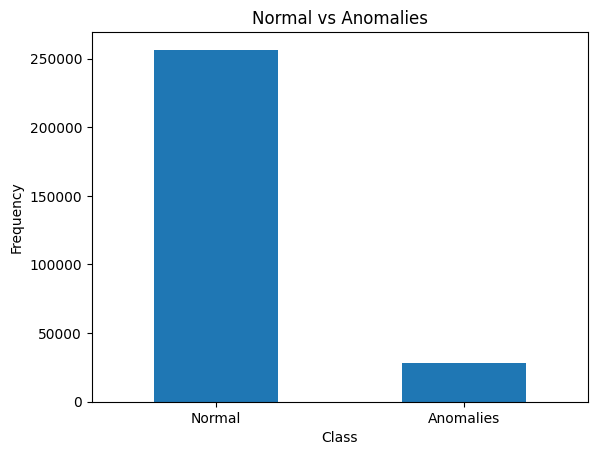

In [43]:
# the predicted anomalies
LABELS = ["Normal",'Anomalies']
count_classes = pd.value_counts(data2['anomaly'],sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Normal vs Anomalies")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [54]:
#Evaluating the model
#threshold set to >9999 as an outlier
outliers_counter = len(data2[data2['Amount']>9999])
outliers_counter

8